In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import librosa
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [71]:
url = (r"C:\Users\Ashish\Desktop\Datasets\baseball.csv")
df = pd.read_csv(url)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [15]:
#check the null values are available or not in data set
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value

In [16]:
df.describe(include="all")

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [17]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


#### OBESRVATION:
    
There is no missing values as well as no Null Values in given dataset.
further observation we'll see in graphs

In [18]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [19]:
#converting float data type in to int data type
df[['ERA']]=df[['ERA']].astype(int)

In [20]:
df.dtypes

W      int64
R      int64
AB     int64
H      int64
2B     int64
3B     int64
HR     int64
BB     int64
SO     int64
SB     int64
RA     int64
ER     int64
ERA    int32
CG     int64
SHO    int64
SV     int64
E      int64
dtype: object

In [21]:
df.shape

(30, 17)

In [22]:
#Duplicate Removal
df.drop_duplicates(inplace=True)
df.shape

(30, 17)

#### OBESRVATION:
    
No duplicate values in dataset

### Vusualize the data distribution by using distplot and analyze the skewness or outliers

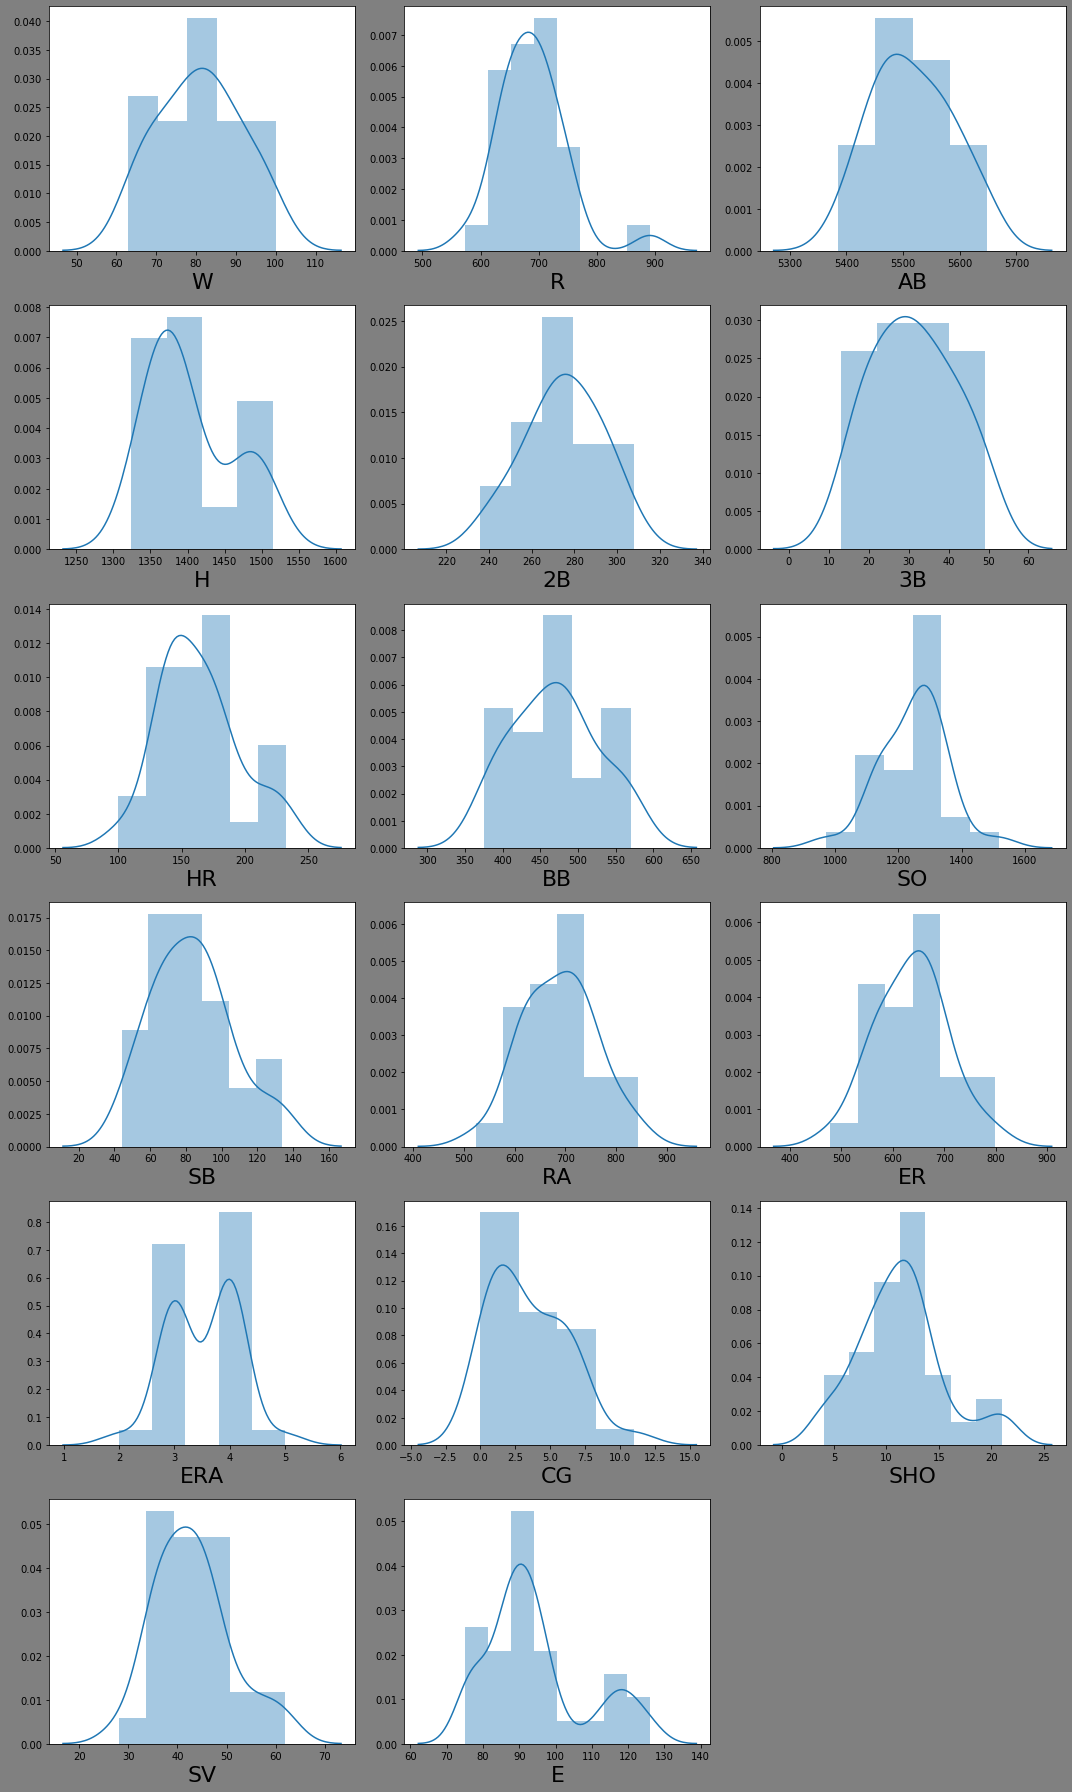

In [23]:
#let see how data is distribute in every column

plt.figure(figsize=(15,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.tight_layout()

### Detecting Outliers with the help of boxplot 

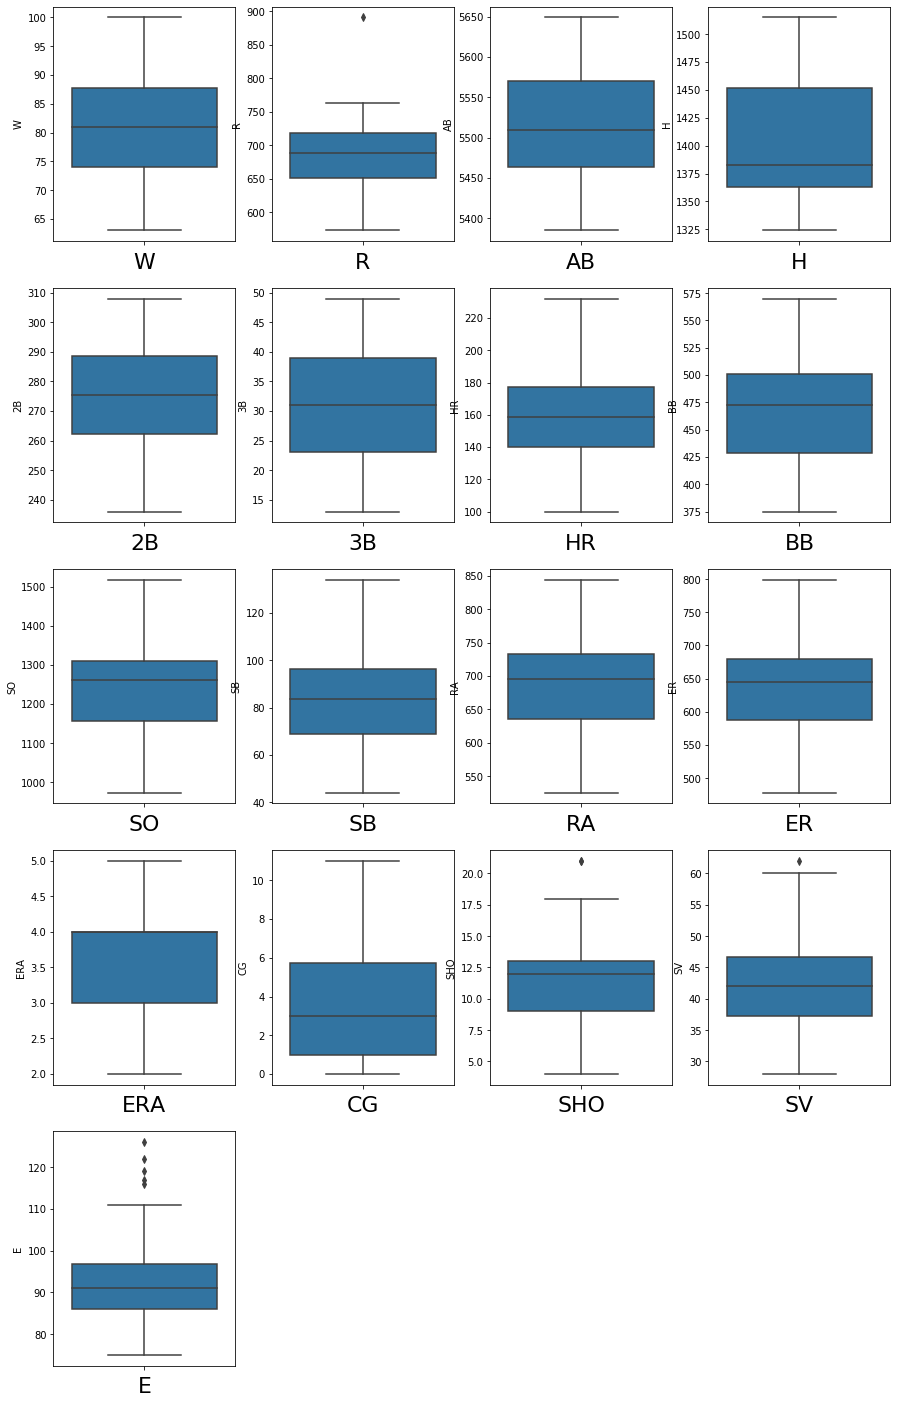

In [24]:
plt.figure(figsize=(15,25))
graph=1

for column in df:
    if graph<=17:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(df[column],orient = 'v')
        plt.xlabel(column,fontsize=22)
    graph+=1
plt.show()

#### OBESRVATION:
    
Feature R,SHO,SV,E which have quit amount of outlier .if the detected outliers are remove by using Z_Score or IQR method we may loose some point of data
If outliers are remove by using quantile method .lossing data possibility is very less

In [25]:
#No need to visualize the lable's , seperating only features into new dataframe
df_feature = df.drop('W',axis = 1)
df_label = df['W']

##### Remove ouotlier by using IQR method

In [26]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df_feature.quantile(0.25)

#3rd quantile
q3 = df_feature.quantile(0.75)

#IQR
iqr = q3 - q1

In [27]:
#Removing Outlier Using IQR Method
df_new = df_feature[~((df_feature < (q1 - 1.5 * iqr)) |(df_feature > (q3 + 1.5 * iqr))).any(axis=1)]

In [28]:
print("shape Before and after")
print("shape before".ljust(20),":",df_feature.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(df_feature.shape[0]-df_new.shape[0]/df_feature.shape[0]))

shape Before and after
shape before         : (30, 16)
shape after          : (21, 16)
Precentage of data loss : 29.3


#### OBSERVATION:
    BY using IQR method we are lossing 29% data which is we can't afford

#### Remove outlier by using Z_ Score 

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df_feature))
threshold = 3
df_new = df_feature[(z<3).all(axis = 1)]

In [30]:
print("shape Before and after")
print("shape before".ljust(20),":",df_feature.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(df_feature.shape[0]-df_new.shape[0]/df_feature.shape[0]))

shape Before and after
shape before         : (30, 16)
shape after          : (29, 16)
Precentage of data loss : 29.033333333333335


#### OBSERVATION:
    Same story here By using Z_Score method we are lossing 29% data which is we can't afford

#### Remove outliers by using others statistical methods

In [31]:
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats

In [32]:
sk=df_feature.skew()

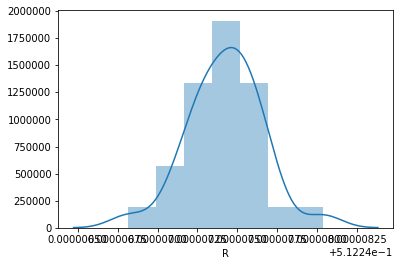

In [33]:
df_feature['R']=stats.boxcox(df_feature['R'])[0]
pd.Series(df_feature['R']).skew()
#visualizing dist plot
sns.distplot(df_feature['R'])

Now data is normally distributed

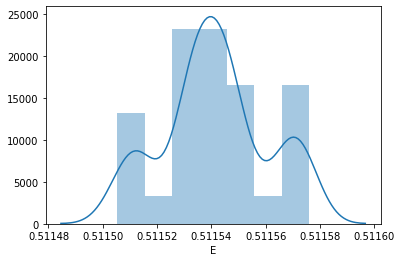

In [34]:
df_feature['E']=stats.boxcox(df_feature['E'])[0]
pd.Series(df_feature['E']).skew()

#visualizing dist plot
sns.distplot(df_feature['E'])

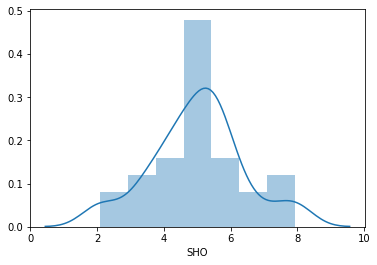

In [35]:
df_feature['SHO']=stats.boxcox(df_feature['SHO'])[0]
pd.Series(df_feature['SHO']).skew()

#visualizing dist plot
sns.distplot(df_feature['SHO'])

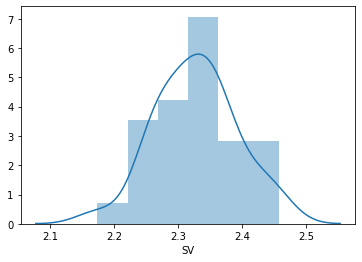

In [36]:
df_feature['SV']=stats.boxcox(df_feature['SV'])[0]
pd.Series(df_feature['SV']).skew()

#visualizing dist plot
sns.distplot(df_feature['SV'])

In [37]:
df_feature.skew()

R      0.000000
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.133406
CG     0.736845
SHO    0.007266
SV     0.000696
E      0.063484
dtype: float64

#almost all features skewness has been removed now features are ready to train in algorithms along with there O/P's .

In [38]:
df_feature.shape

(30, 16)

In [39]:
df_feature.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
R,1.000000,0.365184,0.472801,0.572241,0.001868,0.677879,0.378225,0.017861,0.078819,-0.074555,-0.068649,0.001996,0.213952,-0.076049,-0.043055,-0.002356
AB,0.365184,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.301736,-0.080876,-0.193342,-0.142344,0.333196
H,0.472801,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.170315,0.147955,-0.134626,-0.156398,-0.038883
2B,0.572241,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.305272,0.306675,0.066734,0.135425,0.121662
3B,0.001868,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.331578,-0.065898,-0.052629,-0.196523,0.092557
HR,0.677879,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.010569,0.156502,-0.042299,0.001921,-0.175419
BB,0.378225,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.363897,0.462478,0.398672,0.112909,-0.073773
SO,0.017861,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.016490,-0.093418,0.208289,0.164877,0.173418
SB,0.078819,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.165847,-0.020783,-0.101114,-0.199779,0.067628
RA,-0.074555,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.888466,-0.016659,-0.638860,-0.594128,0.234751


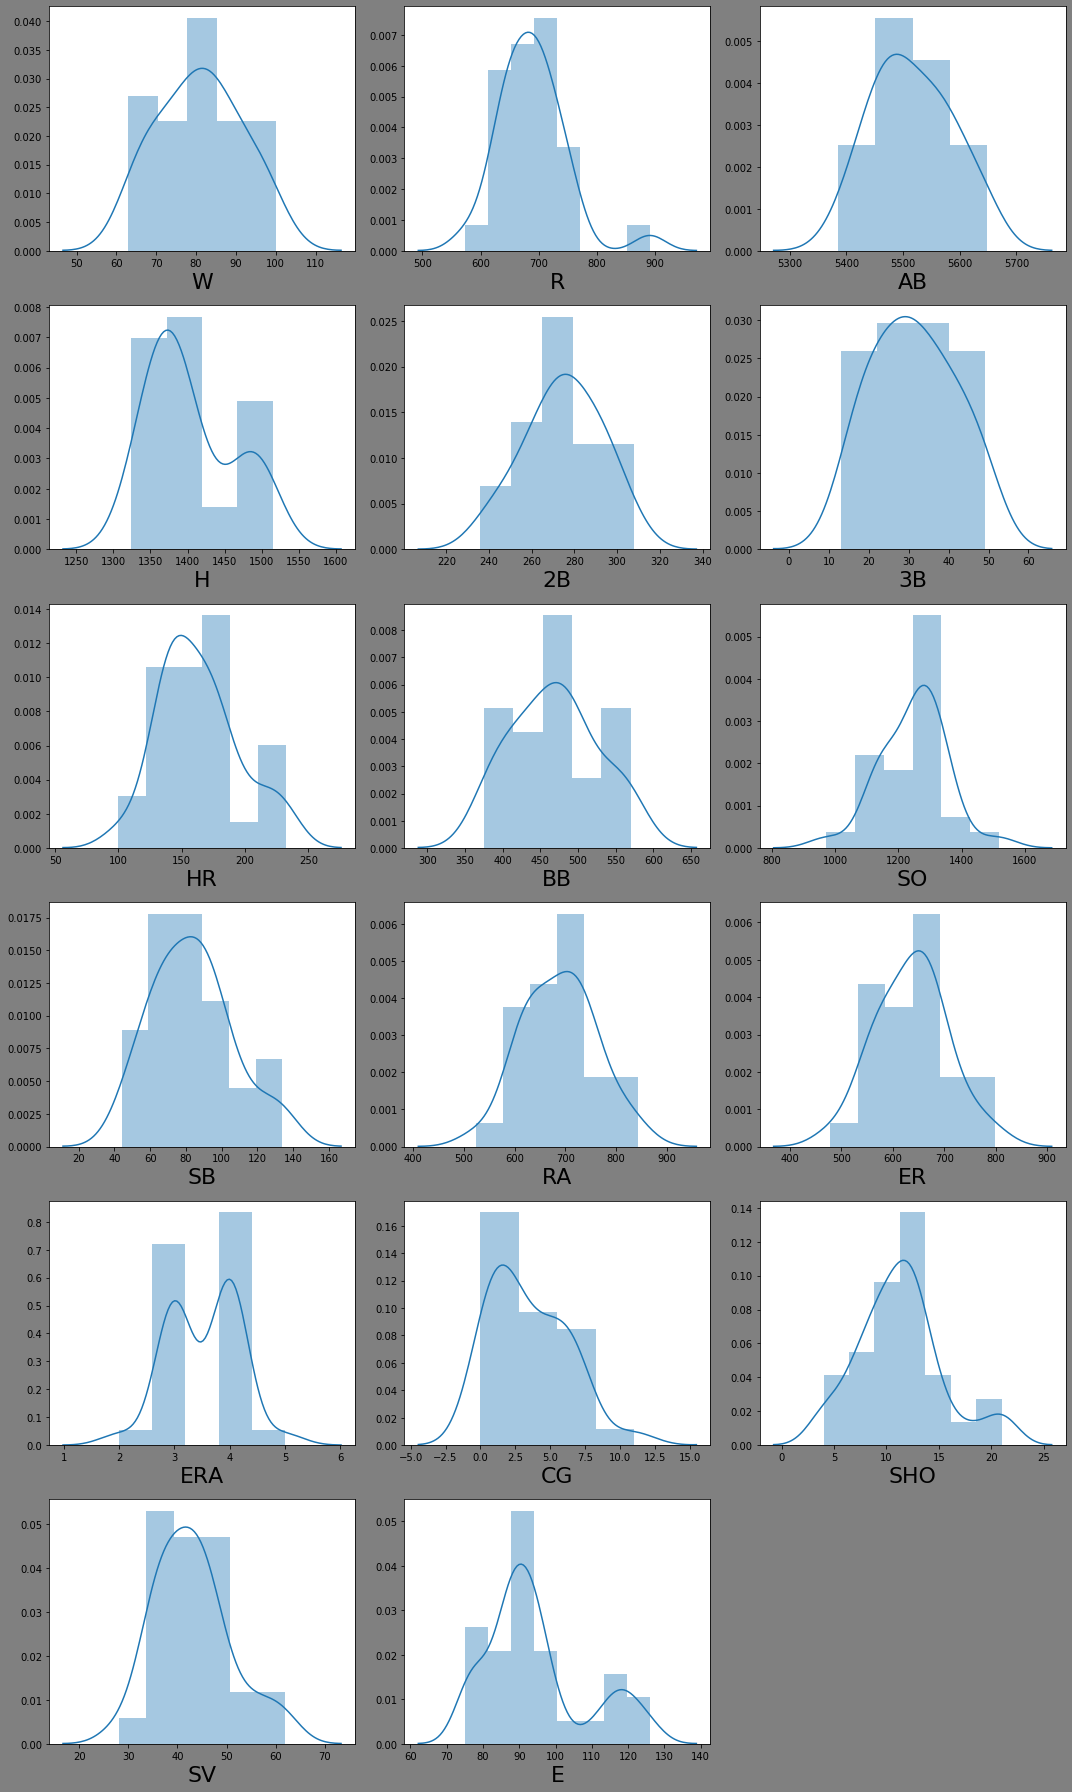

In [851]:
#let see how data is distribute in every column

plt.figure(figsize=(15,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.tight_layout()

#### For Feature Selection We use VIF

Now we process by checking the muticolliniarity in the dependant vaiable before that we should scale our data 

In [41]:
#Scaled all required features
scalar = StandardScaler()
x_scaled = scalar.fit_transform(df_feature)

In [42]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = df_feature.columns

In [43]:
vif

,vif,Features
0,10.474714,R
1,4.138829,AB
2,7.748631,H
3,4.206283,2B
4,3.633179,3B
5,9.266573,HR
6,3.537541,BB
7,2.614657,SO
8,1.888349,SB
9,167.816274,RA


From above vif score of each feature we observed that.
those feature score is  >10 it mean that feature is highly co-related with  other.
by using all features in algo. which effect below things.

1)Time Consuption ultimately leads for money,space complexity
2) Accurecy of algorithm

So, we have to remove the features which have VIF>10.

#### IMP NOTE :
    We have very less no. of columns so we can't apply PCA on it

In [44]:
df_feature=df_feature.drop(columns = ['RA'])

In [45]:
df_feature=df_feature.drop(columns = ['ER'])

In [46]:
#after removinf the >10 vif feature shape of dataset
df_feature.shape

(30, 14)

### Apply Different Algorithms

#### Model instantiating and training

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,df_label,test_size=0.22,random_state=99)

In [49]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print('happiness score :',regression.predict(scalar.transform([[0.512248,5572,1479,274,49,186,388,1283,97,5,4,2.084364,2.270153,0.511546]])))

ValueError: operands could not be broadcast together with shapes (1,14) (16,) (1,14) 

In [51]:
#Adjusted R2 Score - how good model is able to understand data
regression.score(x_train,y_train)

0.9636369635060763

In [52]:
#How well model fits the test data
regression.score(x_test,y_test)

0.843250349852767

In [53]:
y_pred=regression.predict(x_test)

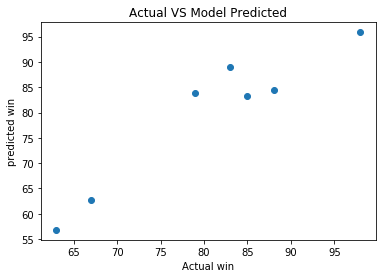

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual win")
plt.ylabel("predicted win")
plt.title("Actual VS Model Predicted")
plt.show()

OBSERVATION:
    
        irrespective of feature envolvement which have >10 VIF. The adjusted R2 and regression score is constant.
        adjusted R2 and regression score is only changing or moving on the basis of training data size which we are passing to model.
        
        Even without removing any outlier from original data columns we are getting Adjusted R2= 94.8% .regression =80.62%.
        if we process with the same we might get quit diverted from our target.so we need to process with cleaned data which outlier and skewness free.
        But as per VIF we remove 1 st 2 feature which have >10 VIF.
        Our data count is very less , so we have to try to tain the algorithm by passing maximum observations .
        we can't remove more features.

In [55]:
#Model Evalution:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
y_pred = regression.predict(x_test)

In [57]:
mean_absolute_error(y_test,y_pred)

4.130684838504209

In [58]:
mean_squared_error(y_test,y_pred)

19.699272359319615

In [59]:
 np.sqrt(mean_squared_error(y_test,y_pred))

4.438386233679942

### Regularization:-

In [60]:
#lets apply the LASSO and Ridge Regression to find that the model is overfitted or not
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [61]:
#LassoCV will return best alpha(Learning rate) after max iteration on overall data.
#Normalize the substracting the mean and dividing by the L2-norm
lasscv=LassoCV(alphas=None,max_iter=500,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=500, n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [62]:
#best alpha parameter
alpha=lasscv.alpha_
print("learning rate alpha(α)=",alpha)

learning rate alpha(α)= 0.12640304046532133


In [63]:
#now we have best parameter ,let's use lasso regression and see how well our data has fitted before in linear regression model

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.12640304046532133, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
lasso_reg.score(x_test,y_test)

0.8758181572279014

### Applying Ridge Regression

In [65]:
#Ridge will best alpha and coefficient after performing 10 class validation
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.0001),normalize=True)
ridgecv

RidgeCV(alphas=array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.00...
       0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968, 0.0969,
       0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976, 0.0977,
       0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984, 0.0985,
       0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992, 0.0993,
       0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=None, store_cv_values=False)

In [66]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0025,
       0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032, 0.0033,
       0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 , 0.0041,
       0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049,
       0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.00...
       0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968, 0.0969,
       0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976, 0.0977,
       0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984, 0.0985,
       0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992, 0.0993,
       0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=None, store_cv_values=False)

In [67]:
ridgecv.alpha_

0.09990000000000004

In [68]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09990000000000004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
ridge_model.score(x_test,y_test)

0.8471762483725537

Conclusion:
    84% score which we are getting in our regression model and same score we are getting after applying  Ridge Regression.mean our model is not overfitted.

In [73]:
#after reaching on maximum accurecy of model we have to save the model
import pickle

In [74]:
filename='finalmodel.pickle'
pickle.dump(LassoCV,open(filename,'wb'))

#prediction using saved model
loaded_model = pickle.load(open(filename, 'rb'))